# YOUR PROJECT TITLE

# OLG Economy (Diamond Model)

The Overlapping Generations (OLG) Diamond model, developed by Peter Diamond in the 1960s, is a widely used framework in economics to examine intergenerational dynamics and various economic phenomena. This model offers valuable insights into the interactions between different generations, capital accumulation, and economic growth.

One key feature of the OLG Diamond model is its intergenerational aspect. The model assumes that individuals are born into the young generation and progress through the life cycle. When individuals reach the old stage, they retire and transfer their accumulated wealth to the next generation. This intergenerational transfer mechanism is a fundamental aspect of the model and plays a crucial role in determining economic outcomes and welfare.

We will investigate how households optimize their consumption, saving, and labor supply decisions over their lifetimes. By examining the equilibrium conditions of the model, we aim to understand the factors that drive consumption, savings, and welfare outcomes in an OLG Diamond framework.

The utility is given by:

$$ U = \ln(c_{1t}) + \beta \ln(c_{2t+1}), \beta \in [0,1]$$

The single period dynamic budget constraints are:

$$ c_{1t} = w_t - s_t $$
$$ c_{2t+1} = (1+r_{t+1}) s_t $$

The intertemporal Budget Constraint (IBC) is:

$$ c_{1t} + \frac{c_{2t+1}}{1+r_{t+1}} = w_t $$



We start off by importing all the relevant packages for our analysis

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
sm.init_printing(use_unicode=True)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib import cm
import ipywidgets as widgets

We are now defining all the variables and parameters from our model. 

In [27]:
# Variables and parameters from utility function
C1t = sm.symbols('C_1t')
C2t_1 = sm.symbols('C_2t+1')
U_t = sm.symbols('U_t')

# Variables and parameters from budget constraint and period constraints
alpha = sm.symbols('alpha')
beta = sm.symbols('beta')
w_t = sm.symbols('w_t')
k_t = sm.symbols('k_t')
r_t = sm.symbols('r_t')
r_t1 = sm.symbols('r_t+1')

A = sm.symbols('A') 
St = sm.symbols('S_t') 
s = sm.symbols('s(r_t+1)') 
yt = sm.symbols('y_t')


Budget constraints are given as:


Then we combine the constraints:


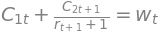

In [10]:
# Defining utility function and constraints
U = sm.log(C1t) + beta * sm.log(C2t_1)
cons1 = sm.Eq(C1t + St, w_t)
cons2 = sm.Eq(C2t_1, (1+r_t1)*St)

# To find one budget constraint we solve for s_t:
st_from_cons2 = sm.solve(cons2, St)
cons1_with_st = cons1.subs(St, st_from_cons2[0])

print('Budget constraints are given as:')
display(cons1)
display(cons2)
print('Then we combine the constraints:')
display(cons1_with_st)




optimal Consumption in period 1:


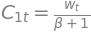

optimal Consumption in period 2:


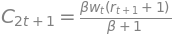

Euler Equation:


In [15]:
C2t_1_from_cons = sm.solve(cons1_with_st, C2t_1)
obj_subs = U.subs(C2t_1, C2t_1_from_cons[0])
foc1 = sm.diff(obj_subs, C1t)
solve_1 = sm.solve(sm.Eq(foc1, 0), C1t)
opt_c1t = sm.Eq(C1t, solve_1[0])

c1t_from_cons = sm.solve(cons1_with_st, C1t)
obj_subs = U.subs(C1t, c1t_from_cons[0])
foc2 = sm.diff(obj_subs, C2t_1)
solve_2 = sm.solve(sm.Eq(foc2, 0), C2t_1)
opt_c2t1 = sm.Eq(C2t_1, solve_2[0])

euler = solve_2[0]/solve_1[0]
euler_eq = sm.Eq(C2t_1/C1t, euler)

print('optimal Consumption in period 1:')
display(opt_c1t)
print('optimal Consumption in period 2:')
display(opt_c2t1)
print('Euler Equation:')
display(euler_eq)



Saving Equation:


Insert optimal first period consumption:


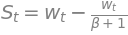

Simplify:


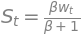

In [25]:
#Savings

savings_P1 = sm.solve(cons1, St)
savings_P1_eq = sm.Eq(St, savings_P1[0])
savings = savings_P1_eq.subs(C1t, solve_1[0])
simple_savings = sm.simplify(savings)

print('Saving Equation:')
display(savings_P1_eq)
print('Insert optimal first period consumption:')
display(savings)
print('Simplify:')
display(simple_savings)


From the savings equation we can see that savings is not dependent on $ r_{t+1} $.

In [30]:
#Production

f = A*k_t**alpha
print('production function:')
display(sm.Eq(yt, f))

production function:


In [34]:
interest_rate = sm.diff(f,k_t)
interest_rate = sm.simplify(interest_rate)
print('Interest Rate:')
display(sm.Eq(r_t,interest_rate))

Interest Rate:


In [36]:
wage = f-sm.diff(f,k_t)*k_t
wage = sm.simplify(wage)
print('Wage Rate per Unit of Effective Labor:')
display(sm.Eq(w_t,wage))

Wage Rate per Unit of Effective Labor:


Transition Equation:


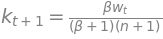

In [41]:
kt1 = sm.symbols('k_t+1')

g = sm.symbols('g')
n = sm.symbols('n')

transition_int = sm.Eq(kt1, 1/(1+n) * beta/(1+beta) *w_t)
print('Transition Equation:')
display(transition_int)

Transition Equation with Saving and Wage rates plugged-in:


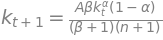

In [43]:
transition_int2 = transition_int.subs(w_t,wage)
print('Transition Equation with Saving and Wage rates plugged-in:')
display(transition_int2)

In SS k is constant:


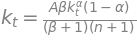

In [44]:
steady_state = transition_int2.subs(kt1,k_t)
print('In SS k is constant:')
display(steady_state)

Steady-State k:


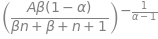

In [45]:
k_steady_state = sm.solve(steady_state,k_t)[0]
print('Steady-State k:')
display(k_steady_state)

<function matplotlib.pyplot.show(close=None, block=None)>

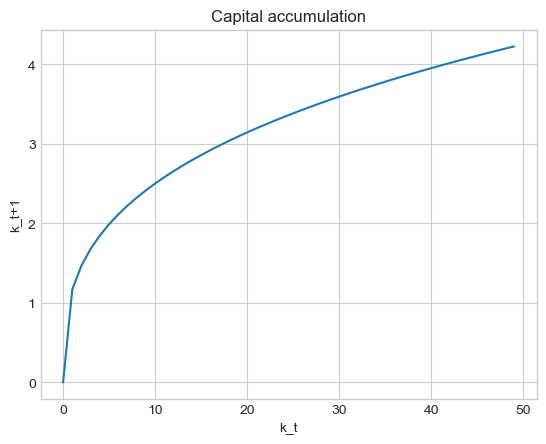

In [50]:
#Define parameters
alpha = 0.33
beta = 0.22
tau = 0.18
A = 10
n = 0.04

#we let $k_t$ be in [0,50]
k_t = np.linspace(0,50)

#We define capital accumulation and steady state
k_t1 = (A*beta*k_t**alpha*(1-alpha))/((beta+1)*(1+n))

ss_k = ((A*beta*(1-alpha))/(beta*n + beta + n +1)**(-1/(alpha-1)))

plt.plot(k_t1)
plt.title('Capital accumulation')
plt.ylabel('k_t+1')
plt.xlabel('k_t')
plt.show

In [51]:
print('steady state:')
print(ss_k)

steady state:
1.0331879190712787
